# ML - Assignment 4

__[Juan Sebastian Corredor Rodriguez](https://github.com/juanse1608) - jucorredorr@unal.edu.co__

__Valentina Cobo Paz - vcobop@unal.edu.co__

__Yacir Ramirez Acevedo - ya.ramirez1763@gmail.com__

## IMBD Movies Classifcation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sc
import cv2 as cv
import json
from glob import glob
from glob import iglob
from sklearn import metrics
import itertools

In [2]:
%cd /Users/danielmartinez/Documents/Universidad/Datasets/MoviesUNAL/mmimdb/dataset

/Users/danielmartinez/Documents/Universidad/Datasets/MoviesUNAL/mmimdb/dataset


In [3]:
movies = []
for file_name in glob("*.json"):
    with open(file_name) as f:
        movies.append(json.load(f)['genres'])

In [4]:
movies_flatted = list(itertools.chain(*movies))
movies_flatted_pd = pd.DataFrame({"Genres": movies_flatted})

In [5]:
len(movies_flatted)

64570

In [6]:
#movies_flatted_pd['Genres'].hist(bins = 20)
np.unique(movies_flatted)

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show',
       'Thriller', 'War', 'Western'], dtype='<U11')

In [7]:
movies_flatted_pd['Genres'].value_counts()

Drama          13967
Comedy          8592
Romance         5364
Thriller        5192
Crime           3838
Action          3550
Adventure       2710
Horror          2703
Documentary     2082
Mystery         2057
Sci-Fi          1991
Fantasy         1933
Family          1668
Biography       1343
War             1335
History         1143
Music           1045
Animation        997
Musical          841
Western          705
Sport            634
Short            471
Film-Noir        338
News              64
Adult              4
Talk-Show          2
Reality-TV         1
Name: Genres, dtype: int64

Text(0, 0.5, 'Frequency')

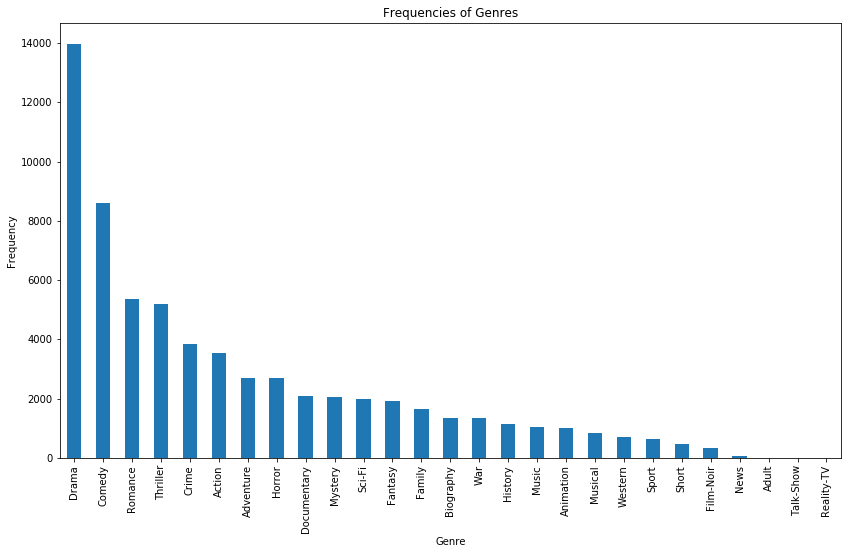

In [8]:
ax = movies_flatted_pd['Genres'].value_counts().plot(kind='bar', figsize=(14,8), title="Frequencies of Genres")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency")

In [9]:
genres_most_frequent = list(movies_flatted_pd['Genres'].value_counts()[0:6].index)
genres_most_frequent

['Drama', 'Comedy', 'Romance', 'Thriller', 'Crime', 'Action']

In [10]:
file_names = []
genres = []
for file_name in glob("*.json"):
    with open(file_name) as f:
        json_content = json.load(f)['genres']
        if set(json_content) <= set(genres_most_frequent):
            genres.append(json_content)
            file_names.append(file_name.split('.')[0])

In [11]:
print(len(genres), len(file_names))

11056 11056


In [12]:
movies_data = pd.DataFrame({'Genres': genres ,'Ids': file_names})
movies_data.shape

(11056, 2)

In [13]:
print(movies_data.head())

                      Genres      Ids
0   [Comedy, Drama, Romance]  0762138
1                    [Drama]  0478999
2  [Action, Drama, Thriller]  0770806
3           [Drama, Romance]  0176422
4                   [Comedy]  0974959


In [14]:
condition = []
for row in range(len(movies_data)):
    value = (len(movies_data['Genres'][row]) == 1)
    condition.append(value)
len(condition)    

11056

In [15]:
movies_data = movies_data.iloc[condition,:]
movies_data = movies_data.set_index(pd.Index(range(len(movies_data))))
print(movies_data.head())

     Genres      Ids
0   [Drama]  0478999
1  [Comedy]  0974959
2  [Comedy]  0306047
3   [Drama]  0228277
4   [Drama]  1277737


In [16]:
new_genres = []
for row in range(len(movies_data)):
    value = movies_data['Genres'][row][0] 
    new_genres.append(value)
print(new_genres[0:5])    

['Drama', 'Comedy', 'Comedy', 'Drama', 'Drama']


In [17]:
movies_data['Genres'] = new_genres
print(movies_data.head())

   Genres      Ids
0   Drama  0478999
1  Comedy  0974959
2  Comedy  0306047
3   Drama  0228277
4   Drama  1277737


In [18]:
%cd /Users/danielmartinez/Documents/Universidad/Datasets/MoviesUNAL/mmimdb/
for file_name in glob("*.json"):
    with open(file_name) as f:
        splits = json.load(f)

/Users/danielmartinez/Documents/Universidad/Datasets/MoviesUNAL/mmimdb


In [19]:
#Look for the keys in the json list
splits.keys()

dict_keys(['train', 'dev', 'test'])

In [20]:
train_ids =  pd.DataFrame({'Ids': splits['train']})
dev_ids =  pd.DataFrame({'Ids': splits['dev']})
test_ids =  pd.DataFrame({'Ids': splits['test']})

In [21]:
train_genres = pd.merge(movies_data, train_ids, on='Ids', how='inner')
train_genres.shape

(2520, 2)

In [22]:
dev_genres = pd.merge(movies_data, dev_ids, on='Ids', how='inner')
dev_genres.shape

(439, 2)

In [23]:
test_genres = pd.merge(movies_data, test_ids, on='Ids', how='inner')
test_genres.shape

(1285, 2)

In [24]:
#Testing: the resulted number must ve the amount of data in movies_data
(train_genres.shape[0] + test_genres.shape[0] + dev_genres.shape[0]) == (movies_data.shape[0])

True

In [25]:
#We create vectors (one per type: train, dev and test) containg the name of the files corresponding to the images
#for posterior loading or reading 
train_paths = train_genres['Ids']
train_paths = train_paths + '.jpeg'
dev_paths = dev_genres['Ids']
dev_paths = dev_paths + '.jpeg'
test_paths = test_genres['Ids']
test_paths = test_paths + '.jpeg'

In [120]:
%cd /Users/danielmartinez/Documents/Universidad/Datasets/MoviesUNAL/mmimdb/dataset/

/Users/danielmartinez/Documents/Universidad/Datasets/MoviesUNAL/mmimdb/dataset


In [ ]:
images_movies_dev = pd.DataFrame([])
contador = 0
for image_path in dev_paths:
    img = cv.imread(image_path)
    movie = pd.Series(img.flatten(), name=image_path)
    images_movies_dev = images_movies_dev.append(movie)
    if contador%20 == 0:
        print(contador)
    contador += 1

0
20
40
60


In [ ]:
images_movies_train = pd.DataFrame([])
contador = 0
for image_path in train_paths:
    img = cv.imread(image_path)
    movie = pd.Series(img.flatten(), name=image_path)
    images_movies_train = images_movies_train.append(movie)
    if contador%20 == 0:
        print(contador)
    contador += 1

In [ ]:
images_movies_test = pd.DataFrame([])
contador = 0
for image_path in test_paths:
    img = cv.imread(image_path)
    movie = pd.Series(img.flatten(), name=image_path)
    images_movies_test = images_movies_test.append(movie)
    if contador%20 == 0:
        print(contador)
    contador += 1